Notebook 1: Data Exploration & Analysis

This notebook covers:
- Loading the fraud detection datasets
- Exploratory Data Analysis (EDA)
- Class imbalance analysis
- Data quality assessment


In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration for visualizations
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

# Data path
DATA_PATH = '../data/'

print("✅ Configuration completed successfully!")
print(f"📂 Data directory: {DATA_PATH}")

✅ Configuration completed successfully!
📂 Data directory: ../data/


# __Data Loading :__

In [2]:
# Dictionary to store all datasets
datasets = {
    'source': {},
    'target': {}
}

print("=" * 80)
print("LOADING SOURCE DOMAIN DATASETS (kaggle_source_cate_0 to 3)")
print("=" * 80)

# Load all 4 source datasets (i = 0, 1, 2, 3)
for i in range(4):
    print(f"\n Loading Source dataset {i}...")
    try:
        datasets['source'][i] = {
            'X_train': np.load(DATA_PATH + f'kaggle_source_cate_{i}_train.npy'),
            'y_train': np.load(DATA_PATH + f'kaggle_source_cate_{i}_train_label.npy'),
            'X_test': np.load(DATA_PATH + f'kaggle_source_cate_{i}_test.npy'),
            'y_test': np.load(DATA_PATH + f'kaggle_source_cate_{i}_test_label.npy')
        }
        print(f" Source {i} loaded:")
        print(f"      • Train: {datasets['source'][i]['X_train'].shape}")
        print(f"      • Test:  {datasets['source'][i]['X_test'].shape}")
    except FileNotFoundError:
        print(f" Source {i} not found (skipping)")

print("\n" + "=" * 80)
print("LOADING TARGET DOMAIN DATASETS (kaggle_target_cate_0 to 3)")
print("=" * 80)

# Load target datasets (if they exist)
for i in range(4):
    print(f"\n Loading Target dataset {i}...")
    try:
        datasets['target'][i] = {
            'X_train': np.load(DATA_PATH + f'kaggle_target_cate_{i}_train.npy'),
            'y_train': np.load(DATA_PATH + f'kaggle_target_cate_{i}_train_label.npy'),
            'X_test': np.load(DATA_PATH + f'kaggle_target_cate_{i}_test.npy'),
            'y_test': np.load(DATA_PATH + f'kaggle_target_cate_{i}_test_label.npy')
        }
        print(f" Target {i} loaded:")
        print(f"      • Train: {datasets['target'][i]['X_train'].shape}")
        print(f"      • Test:  {datasets['target'][i]['X_test'].shape}")
    except FileNotFoundError:
        print(f" Target {i} not found (skipping)")

print("\n" + "=" * 80)
print("SUMMARY")
print("=" * 80)
print(f"Source datasets available: {list(datasets['source'].keys())}")
print(f"Target datasets available: {list(datasets['target'].keys())}")

# Quick access variables for Part 1 (we'll use all 4 source datasets)
print("\n" + "=" * 80)
print("PART 1: Imbalanced Learning (will use all source datasets)")
print("=" * 80)
for i in datasets['source'].keys():
    n_train = len(datasets['source'][i]['X_train'])
    n_test = len(datasets['source'][i]['X_test'])
    n_features = datasets['source'][i]['X_train'].shape[1]
    print(f"Source {i}: {n_train:,} train | {n_test:,} test | {n_features} features")

# Quick access variables for Part 2 (Domain Adaptation)
print("\n" + "=" * 80)
print("PART 2: Domain Adaptation (Source 0 → Target 0)")
print("=" * 80)
if 0 in datasets['source'] and 0 in datasets['target']:
    X_src_train = datasets['source'][0]['X_train']
    y_src_train = datasets['source'][0]['y_train']
    X_src_test = datasets['source'][0]['X_test']
    y_src_test = datasets['source'][0]['y_test']
    
    X_tgt_train = datasets['target'][0]['X_train']
    y_tgt_train = datasets['target'][0]['y_train']  # Won't be used for training
    X_tgt_test = datasets['target'][0]['X_test']
    y_tgt_test = datasets['target'][0]['y_test']
    
    print(f" Source 0 & Target 0 ready for Domain Adaptation")
    print(f"   Source Train: {X_src_train.shape}")
    print(f"   Target Train: {X_tgt_train.shape} (unlabeled for training)")
    print(f"   Target Test:  {X_tgt_test.shape} (for final evaluation)")
else:
    print(" Warning: Source 0 or Target 0 not available!")

LOADING SOURCE DOMAIN DATASETS (kaggle_source_cate_0 to 3)

 Loading Source dataset 0...
 Source 0 loaded:
      • Train: (41058, 51)
      • Test:  (13686, 51)

 Loading Source dataset 1...
 Source 1 loaded:
      • Train: (41058, 51)
      • Test:  (13686, 51)

 Loading Source dataset 2...
 Source 2 loaded:
      • Train: (41058, 51)
      • Test:  (13686, 51)

 Loading Source dataset 3...
 Source 3 loaded:
      • Train: (41058, 51)
      • Test:  (13686, 51)

LOADING TARGET DOMAIN DATASETS (kaggle_target_cate_0 to 3)

 Loading Target dataset 0...
 Target 0 loaded:
      • Train: (62788, 51)
      • Test:  (20930, 51)

 Loading Target dataset 1...
 Target 1 loaded:
      • Train: (62788, 51)
      • Test:  (20930, 51)

 Loading Target dataset 2...
 Target 2 loaded:
      • Train: (62789, 51)
      • Test:  (20929, 51)

 Loading Target dataset 3...
 Target 3 loaded:
      • Train: (62789, 51)
      • Test:  (20929, 51)

SUMMARY
Source datasets available: [0, 1, 2, 3]
Target datasets 

# __Class Imbalance Analysis :__

CLASS DISTRIBUTION ANALYSIS - SOURCE DATASETS

📊 Source Dataset 0:
   TRAIN SET:
      • Class 0 (legitimate): 36,936 (44.98%)
      • Class 1 (fraud):      4,123 (5.02%)
      • Imbalance Ratio:      8.96:1
   TEST SET:
      • Class 0 (legitimate): 12,383 (45.24%)
      • Class 1 (fraud):      1,304 (4.76%)

📊 Source Dataset 1:
   TRAIN SET:
      • Class 0 (legitimate): 36,970 (45.02%)
      • Class 1 (fraud):      4,089 (4.98%)
      • Imbalance Ratio:      9.04:1
   TEST SET:
      • Class 0 (legitimate): 12,349 (45.12%)
      • Class 1 (fraud):      1,338 (4.89%)

📊 Source Dataset 2:
   TRAIN SET:
      • Class 0 (legitimate): 37,022 (45.09%)
      • Class 1 (fraud):      4,038 (4.92%)
      • Imbalance Ratio:      9.17:1
   TEST SET:
      • Class 0 (legitimate): 12,297 (44.93%)
      • Class 1 (fraud):      1,389 (5.07%)

📊 Source Dataset 3:
   TRAIN SET:
      • Class 0 (legitimate): 37,029 (45.09%)
      • Class 1 (fraud):      4,031 (4.91%)
      • Imbalance Ratio:      9.19

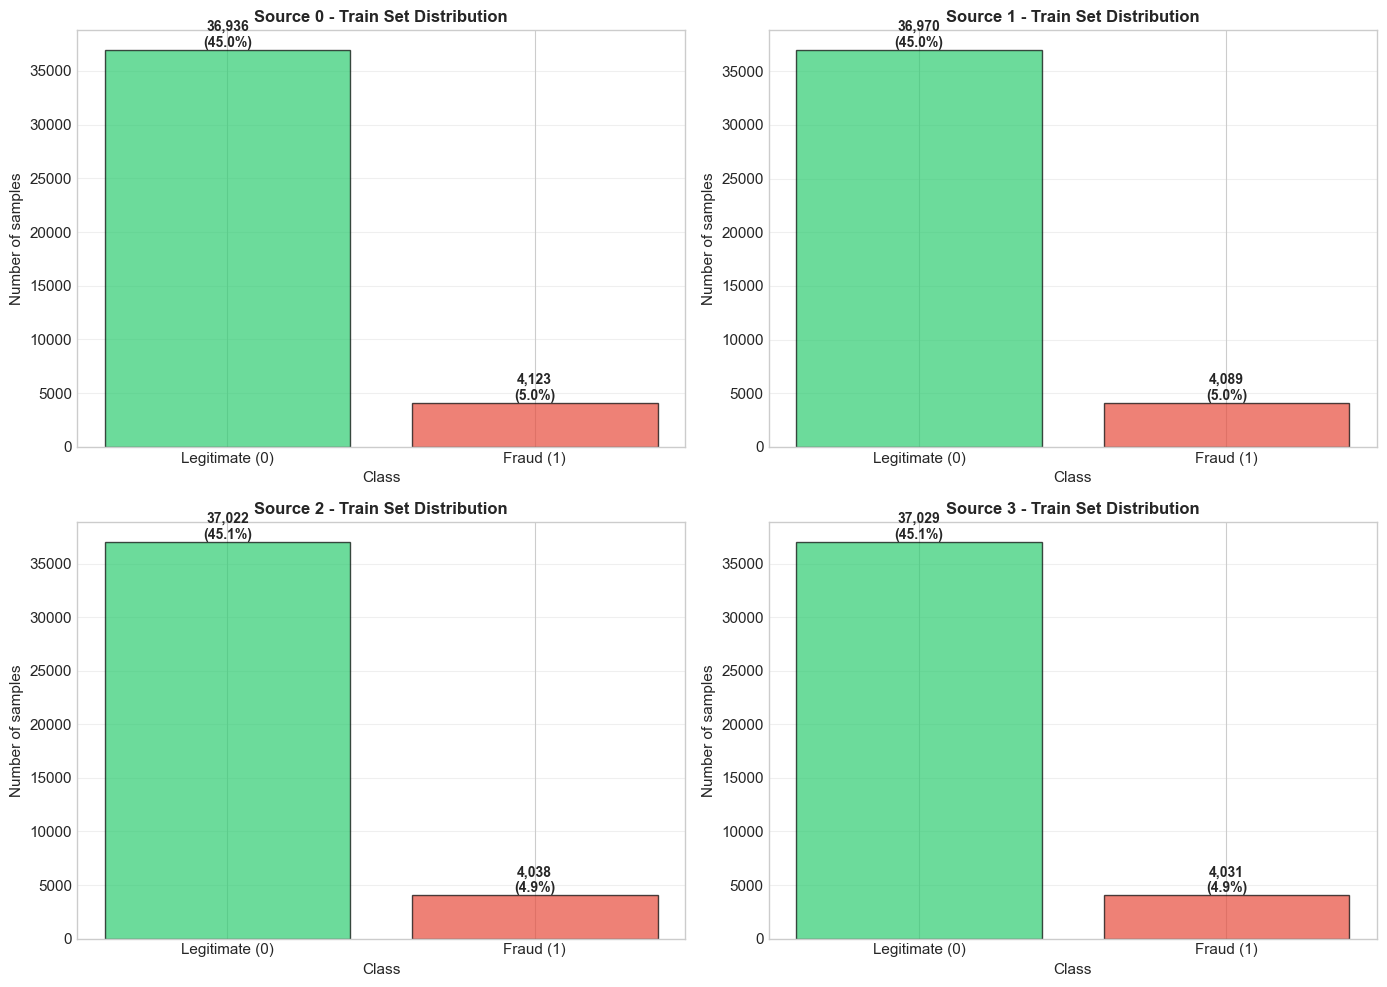


CLASS DISTRIBUTION ANALYSIS - TARGET DATASETS

📊 Target Dataset 0:
   TRAIN SET:
      • Class 0 (legitimate): 58,731 (46.77%)
      • Class 1 (fraud):      4,058 (3.23%)
      • Imbalance Ratio:      14.47:1
   TEST SET:
      • Class 0 (legitimate): 19,571 (46.75%)
      • Class 1 (fraud):      1,360 (3.25%)

📊 Target Dataset 1:
   TRAIN SET:
      • Class 0 (legitimate): 58,758 (46.79%)
      • Class 1 (fraud):      4,032 (3.21%)
      • Imbalance Ratio:      14.57:1
   TEST SET:
      • Class 0 (legitimate): 19,544 (46.69%)
      • Class 1 (fraud):      1,386 (3.31%)

📊 Target Dataset 2:
   TRAIN SET:
      • Class 0 (legitimate): 58,708 (46.75%)
      • Class 1 (fraud):      4,082 (3.25%)
      • Imbalance Ratio:      14.38:1
   TEST SET:
      • Class 0 (legitimate): 19,594 (46.81%)
      • Class 1 (fraud):      1,336 (3.19%)

📊 Target Dataset 3:
   TRAIN SET:
      • Class 0 (legitimate): 58,709 (46.75%)
      • Class 1 (fraud):      4,082 (3.25%)
      • Imbalance Ratio:      

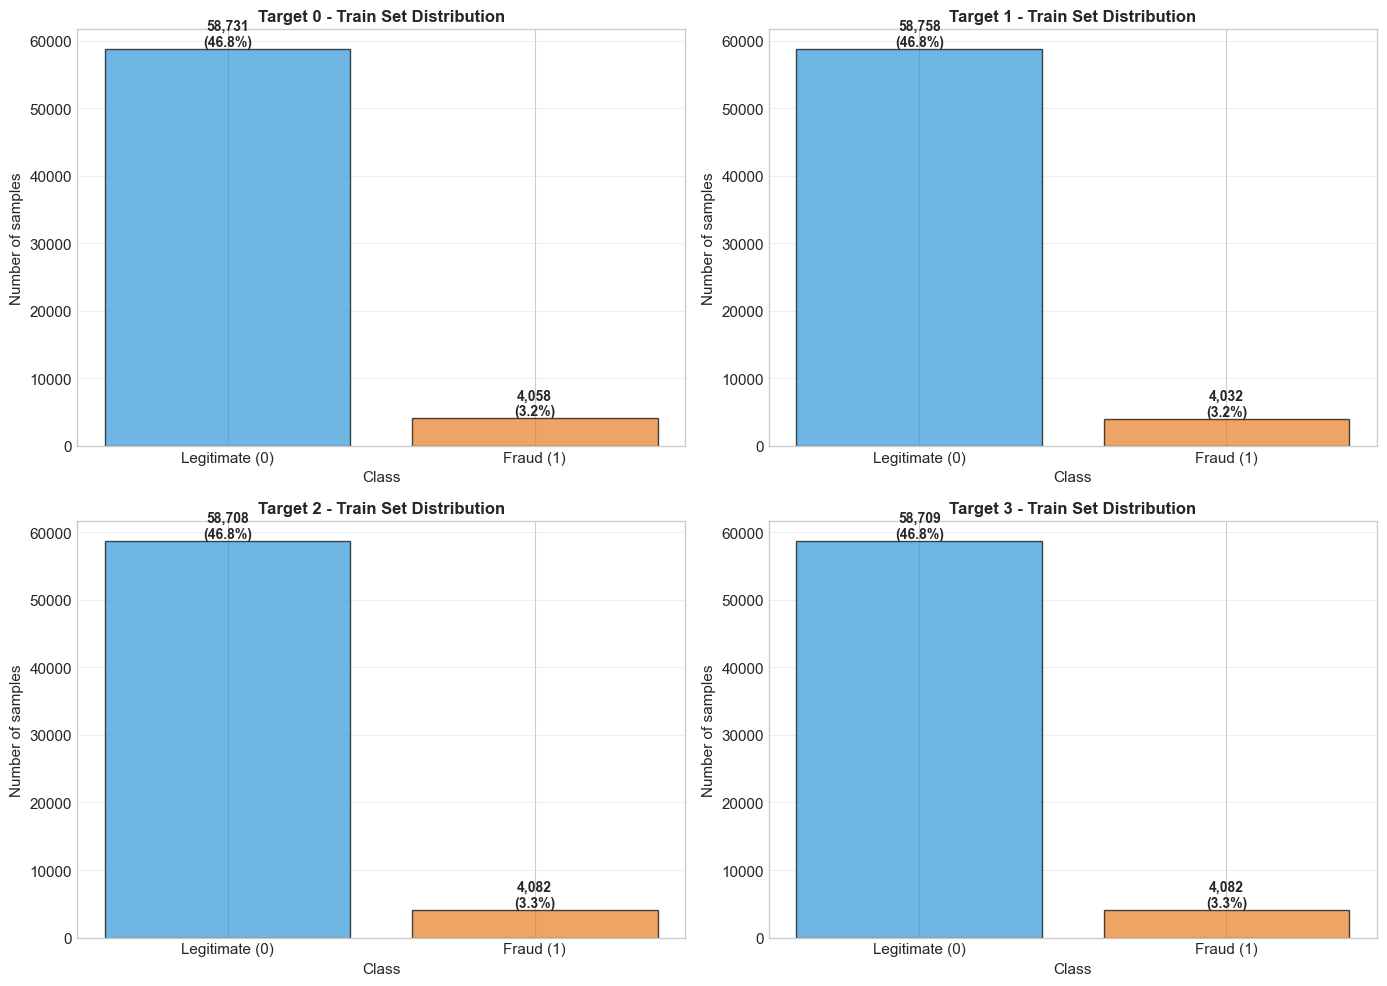


IMBALANCE RATIO SUMMARY
source_0    :   8.96:1  ✅ Moderate
source_1    :   9.04:1  ✅ Moderate
source_2    :   9.17:1  ✅ Moderate
source_3    :   9.19:1  ✅ Moderate
target_0    :  14.47:1  ⚠️ HIGHLY IMBALANCED
target_1    :  14.57:1  ⚠️ HIGHLY IMBALANCED
target_2    :  14.38:1  ⚠️ HIGHLY IMBALANCED
target_3    :  14.38:1  ⚠️ HIGHLY IMBALANCED

💡 KEY INSIGHT:
The high imbalance ratio confirms that standard accuracy is NOT appropriate.
We MUST use F1-Score, Precision, Recall, and AUC-ROC for evaluation.
Sampling techniques (SMOTE, undersampling) will be critical for Part 1.


In [4]:
print("=" * 80)
print("CLASS DISTRIBUTION ANALYSIS - SOURCE DATASETS")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

imbalance_ratios = {}

for i in range(4):
    # Flatten labels to 1D (in case they are 2D arrays)
    y_train = datasets['source'][i]['y_train'].ravel()
    y_test = datasets['source'][i]['y_test'].ravel()
    
    # Count classes in train set
    counter_train = Counter(y_train)
    counter_test = Counter(y_test)
    
    # Calculate imbalance ratio
    class_0_train = counter_train[0]
    class_1_train = counter_train[1]
    ratio = class_0_train / class_1_train
    imbalance_ratios[f'source_{i}'] = ratio
    
    print(f"\n📊 Source Dataset {i}:")
    print(f"   TRAIN SET:")
    print(f"      • Class 0 (legitimate): {class_0_train:,} ({class_0_train/len(y_train)*100:.2f}%)")
    print(f"      • Class 1 (fraud):      {class_1_train:,} ({class_1_train/len(y_train)*100:.2f}%)")
    print(f"      • Imbalance Ratio:      {ratio:.2f}:1")
    
    print(f"   TEST SET:")
    print(f"      • Class 0 (legitimate): {counter_test[0]:,} ({counter_test[0]/len(y_test)*100:.2f}%)")
    print(f"      • Class 1 (fraud):      {counter_test[1]:,} ({counter_test[1]/len(y_test)*100:.2f}%)")
    
    # Visualization
    ax = axes[i]
    classes = ['Legitimate (0)', 'Fraud (1)']
    counts = [class_0_train, class_1_train]
    colors = ['#2ecc71', '#e74c3c']
    
    bars = ax.bar(classes, counts, color=colors, alpha=0.7, edgecolor='black')
    ax.set_title(f'Source {i} - Train Set Distribution', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of samples', fontsize=11)
    ax.set_xlabel('Class', fontsize=11)
    
    # Add percentage labels on bars
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}\n({count/len(y_train)*100:.1f}%)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/class_distribution_source.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 80)
print("CLASS DISTRIBUTION ANALYSIS - TARGET DATASETS")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i in range(4):
    # Flatten labels to 1D
    y_train = datasets['target'][i]['y_train'].ravel()
    y_test = datasets['target'][i]['y_test'].ravel()
    
    # Count classes
    counter_train = Counter(y_train)
    counter_test = Counter(y_test)
    
    # Calculate imbalance ratio
    class_0_train = counter_train[0]
    class_1_train = counter_train[1]
    ratio = class_0_train / class_1_train
    imbalance_ratios[f'target_{i}'] = ratio
    
    print(f"\n📊 Target Dataset {i}:")
    print(f"   TRAIN SET:")
    print(f"      • Class 0 (legitimate): {class_0_train:,} ({class_0_train/len(y_train)*100:.2f}%)")
    print(f"      • Class 1 (fraud):      {class_1_train:,} ({class_1_train/len(y_train)*100:.2f}%)")
    print(f"      • Imbalance Ratio:      {ratio:.2f}:1")
    
    print(f"   TEST SET:")
    print(f"      • Class 0 (legitimate): {counter_test[0]:,} ({counter_test[0]/len(y_test)*100:.2f}%)")
    print(f"      • Class 1 (fraud):      {counter_test[1]:,} ({counter_test[1]/len(y_test)*100:.2f}%)")
    
    # Visualization
    ax = axes[i]
    classes = ['Legitimate (0)', 'Fraud (1)']
    counts = [class_0_train, class_1_train]
    colors = ['#3498db', '#e67e22']
    
    bars = ax.bar(classes, counts, color=colors, alpha=0.7, edgecolor='black')
    ax.set_title(f'Target {i} - Train Set Distribution', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of samples', fontsize=11)
    ax.set_xlabel('Class', fontsize=11)
    
    # Add percentage labels on bars
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}\n({count/len(y_train)*100:.1f}%)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/class_distribution_target.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 80)
print("IMBALANCE RATIO SUMMARY")
print("=" * 80)
for dataset, ratio in imbalance_ratios.items():
    print(f"{dataset:12s}: {ratio:6.2f}:1  {'⚠️ HIGHLY IMBALANCED' if ratio > 10 else '✅ Moderate'}")

print("\n" + "=" * 80)
print("💡 KEY INSIGHT:")
print("=" * 80)
print("The high imbalance ratio confirms that standard accuracy is NOT appropriate.")
print("We MUST use F1-Score, Precision, Recall, and AUC-ROC for evaluation.")
print("Sampling techniques (SMOTE, undersampling) will be critical for Part 1.")

# __Missing Values & Feature Statistics :__

MISSING VALUES ANALYSIS

  Dataset  Train NaN  Train %  Test NaN  Test %
Source 0          0      0.0         0     0.0
Source 1          0      0.0         0     0.0
Source 2          0      0.0         0     0.0
Source 3          0      0.0         0     0.0
Target 0          0      0.0         0     0.0
Target 1          0      0.0         0     0.0
Target 2          0      0.0         0     0.0
Target 3          0      0.0         0     0.0

 NO MISSING VALUES DETECTED
 Data is clean, no imputation needed.

FEATURE STATISTICS - SOURCE 0 (Sample)

Descriptive Statistics (first 10 features):
       Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
count  41058.000  41058.000  41058.000  41058.000  41058.000  41058.000   
mean       0.816     77.825      0.755    275.445     49.788      3.187   
std        0.681     27.316      0.904    154.207     15.457      1.126   
min        0.000      0.000      0.000      0.000      0.000      0.000   
25%        0.000     51.

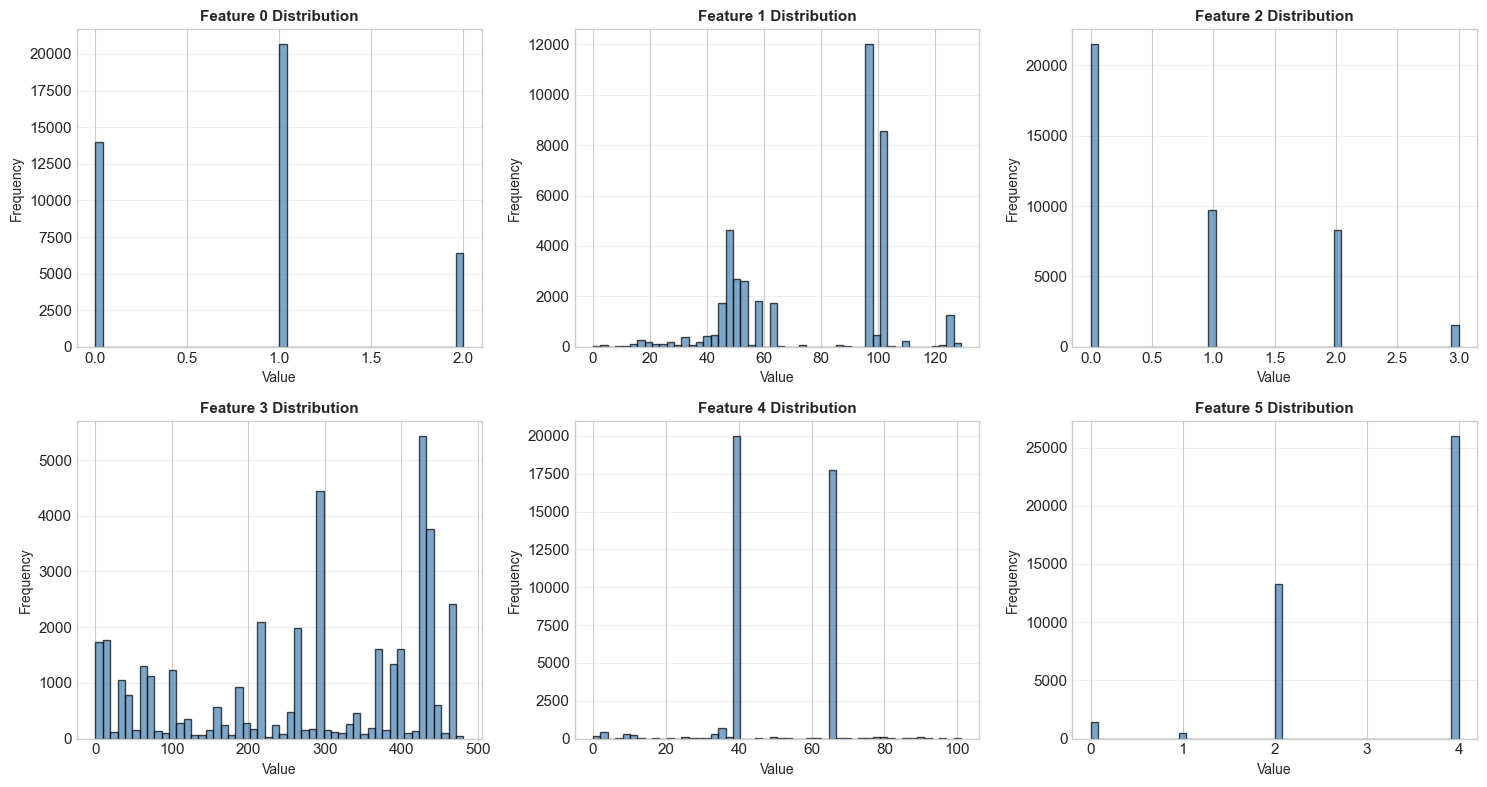


 Feature distributions saved to '../results/feature_distributions_source0.png'


In [5]:
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

# Check missing values for all datasets
missing_summary = []

for domain in ['source', 'target']:
    for i in datasets[domain].keys():
        X_train = datasets[domain][i]['X_train']
        X_test = datasets[domain][i]['X_test']
        
        nan_train = np.isnan(X_train).sum()
        nan_test = np.isnan(X_test).sum()
        
        pct_train = (nan_train / X_train.size) * 100
        pct_test = (nan_test / X_test.size) * 100
        
        missing_summary.append({
            'Dataset': f'{domain.capitalize()} {i}',
            'Train NaN': nan_train,
            'Train %': pct_train,
            'Test NaN': nan_test,
            'Test %': pct_test
        })

# Display as DataFrame
df_missing = pd.DataFrame(missing_summary)
print("\n", df_missing.to_string(index=False))

total_nan = df_missing['Train NaN'].sum() + df_missing['Test NaN'].sum()
print(f"\n{' NO MISSING VALUES DETECTED' if total_nan == 0 else '⚠️ MISSING VALUES FOUND'}")

if total_nan > 0:
    print(" Imputation will be required in preprocessing step.")
else:
    print(" Data is clean, no imputation needed.")

print("\n" + "=" * 80)
print("FEATURE STATISTICS - SOURCE 0 (Sample)")
print("=" * 80)

# Display statistics for first 10 features of Source 0
X_sample = datasets['source'][0]['X_train']
df_stats = pd.DataFrame(X_sample[:, :10], columns=[f'Feature_{i}' for i in range(10)])

print("\nDescriptive Statistics (first 10 features):")
print(df_stats.describe().round(3))

# Check for infinite values
print("\n" + "=" * 80)
print("INFINITE VALUES CHECK")
print("=" * 80)

inf_summary = []
for domain in ['source', 'target']:
    for i in datasets[domain].keys():
        X_train = datasets[domain][i]['X_train']
        X_test = datasets[domain][i]['X_test']
        
        inf_train = np.isinf(X_train).sum()
        inf_test = np.isinf(X_test).sum()
        
        inf_summary.append({
            'Dataset': f'{domain.capitalize()} {i}',
            'Train Inf': inf_train,
            'Test Inf': inf_test
        })

df_inf = pd.DataFrame(inf_summary)
print("\n", df_inf.to_string(index=False))

total_inf = df_inf['Train Inf'].sum() + df_inf['Test Inf'].sum()
print(f"\n{' NO INFINITE VALUES' if total_inf == 0 else ' INFINITE VALUES FOUND'}")

print("\n" + "=" * 80)
print("FEATURE DISTRIBUTION VISUALIZATION - SOURCE 0")
print("=" * 80)

# Plot distribution of first 6 features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

X_source_0 = datasets['source'][0]['X_train']

for i in range(6):
    ax = axes[i]
    ax.hist(X_source_0[:, i], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    ax.set_title(f'Feature {i} Distribution', fontsize=11, fontweight='bold')
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/feature_distributions_source0.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Feature distributions saved to '../results/feature_distributions_source0.png'")